In [0]:
import zipfile
zip_ref = zipfile.ZipFile('datafull.zip', 'r')
zip_ref.extractall('data2')
zip_ref.close()

In [0]:
import pandas as pd
import keras
import skimage.io as io
import glob
import numpy as np
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
training_img = []
training_label = []
for dir_path in glob.glob("data2/*"):
    img_label = dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(dir_path,"*.npy")):
        
        image = np.load(image_path)
        training_img.append(image)
        training_label.append(img_label)
training_img = np.array(training_img)
training_label = np.array(training_label)


In [21]:
training_label[1550:1560]

array(['1', '1', '1', '1', '1', '1', '1', '0', '0', '0'], dtype='<U1')

In [24]:
a = training_img[1]
a

array([[-739, -787, -797, ..., -687, -673, -698],
       [-731, -812, -810, ..., -710, -708, -744],
       [-666, -815, -822, ..., -728, -744, -773],
       ...,
       [  38,    1,   -8, ...,   63,   74,   20],
       [  40,   23,   39, ...,  128,  115,   63],
       [  29,   16,   62, ...,  420,  349,  279]], dtype=int16)

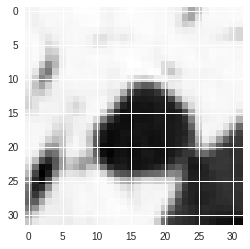

In [35]:

from matplotlib import pyplot as plt
plt.imshow(training_img[98])
plt.show()

In [0]:
def calulate_length(a):
    count = 0;
    top = 0
    bot = 0
    left = 0
    right = 0
    for i in range(16):
        if (a[15-i,15]>0):
            top+=1
        else:
            break;
    for i in range(16):
        if (a[15+i+1,15]>0):
            bot+=1
        else:
            break;
    for i in range(16):
        if (a[15,15-i]>0):
            right+=1
        else:
            break;
    for i in range(16):
        if (a[15,15+i+1]>0):
            left+=1
        else:
            break;
    return max(bot+top,left+right)
            

In [0]:
training_label[1556]

'dataneed\\0'

In [0]:
listlength1 = [calulate_length(img) for img in training_img[1557:]]
listlength0 = [calulate_length(img) for img in training_img[:1556]]    

In [0]:
listlength0 = np.asarray(listlength0)
listlength1 = np.asarray(listlength1)

In [40]:
print(np.min(listlength1))
print(np.max(listlength1))

print(np.mean(listlength1))

0
32
2.006422607578677


In [41]:
print(np.min(listlength0))
print(np.max(listlength0))
print(np.mean(listlength0))

0
32
5.859897172236503


In [0]:
model = keras.models.load_model("weights.32-0.902.hdf5")

In [0]:
test = training_img[1660:1701]
test = test.reshape(test.shape[0], 32, 32, 1)

In [73]:
classes = model.predict_classes(test, batch_size = None)
print(classes)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [51]:
calulate_length(test[0])

26

In [0]:
from gensim.summarization import summarize
from gensim.summarization import summarize
text1 = """If you only have one small tumor in your lung and there is no evidence of cancer in lymph nodes or elsewhere, your doctors may recommend surgery to remove the tumor and the nearby lymph nodes.

Very few patients with SCLC are treated this way. This is only an option if you are in fairly good health and can withstand having all or part of a lung removed.

Before the operation, the lymph nodes in your chest will be checked for cancer spread with mediastinoscopy or other tests, because surgery is unlikely to be a good option if the cancer has spread.

Surgery is generally followed by chemotherapy. If cancer is found in the lymph nodes that were removed, radiation therapy to the chest is usually advised as well. The radiation is often given at the same time as the chemo. Although this increases the side effects of treatment, it appears to be more effective than giving one treatment after the other. You might not be given radiation therapy if you already have severe lung disease (in addition to your cancer) or other serious health problems.

In about half of people with SCLC, the cancer will eventually spread to the brain if no preventive measures are taken. For this reason, you may be given radiation therapy to the head (called prophylactic cranial irradiation, or PCI) to try to prevent this. The radiation is usually given in low doses. Still, some patients may have side effects from the radiation."""
text2 = """For most people with limited stage SCLC, surgery is not an option because the tumor is too large, it’s in a place that can’t be removed easily, or it has spread to nearby lymph nodes or other places in the lung. If you are in good health, the standard treatment is chemo plus radiation to the chest given at the same time (called concurrent chemoradiation). The chemo drugs used are usually etoposide plus either cisplatin or carboplatin.

Concurrent chemoradiation can help people with limited stage SCLC live longer and give them a better chance at cure than giving one treatment (or one treatment at a time). The downside is that this combination has more side effects than either chemo or radiation alone, and it can be hard to take.

People who aren’t healthy enough for chemoradiation are usually treated with chemo by itself. This may be followed by radiation to the chest.

If no measures are taken to prevent it, about half of people with SCLC will have cancer spread to their brain. If your cancer has responded well to initial treatment, you may be given radiation therapy to the head (called prophylactic cranial irradiation, or PCI) to try to prevent this. The radiation is usually given in lower doses than what is used if the cancer had already spread to brain, but some patients may still have side effects from the radiation.

Most people treated with chemo (with or without radiation) for limited stage SCLC will have their tumors shrink significantly. In many, the cancer will shrink to the point where it can no longer be seen on imaging tests. Unfortunately, for most people, the cancer will return at some point.

Because these cancers are hard to cure, clinical trials of newer treatments may be a good option for some people. If you think you might want to take part in a clinical trial, talk to your doctor."""
rcm1 = summarize(text1)
rcm2 = summarize(text2)

In [0]:
def recommend(a):
  count = calulate_length(a)
  a = a.reshape(1,32, 32, 1)
  cancer = model.predict_classes(a, batch_size = None)
  if cancer == 1:
    if count < 4:
      print(rcm1)
    else:
      print(rcm2)
  else:
    print("I think it's not a nodule")
    

In [83]:
recommend(training_img[1650])

I think it's not a nodule


In [84]:
recommend(training_img[1550])

If cancer is found in the lymph nodes that were removed, radiation therapy to the chest is usually advised as well.
You might not be given radiation therapy if you already have severe lung disease (in addition to your cancer) or other serious health problems.
